In [49]:
# -------------------------------- Importações ------------------------------- #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dados da simulação:

In [50]:
# ----------------------------- Importa os dados ----------------------------- #
df1 = pd.read_csv('dadosConcentracao.csv', header=None)

eixo_x = np.array(df1[0], dtype=np.float128)

eixo_y1 = np.array(df1[1], dtype=np.float128)
eixo_y2 = np.array(df1[2], dtype=np.float128)
eixo_y3 = np.array(df1[3], dtype=np.float128)
eixo_y4 = np.array(df1[4], dtype=np.float128)

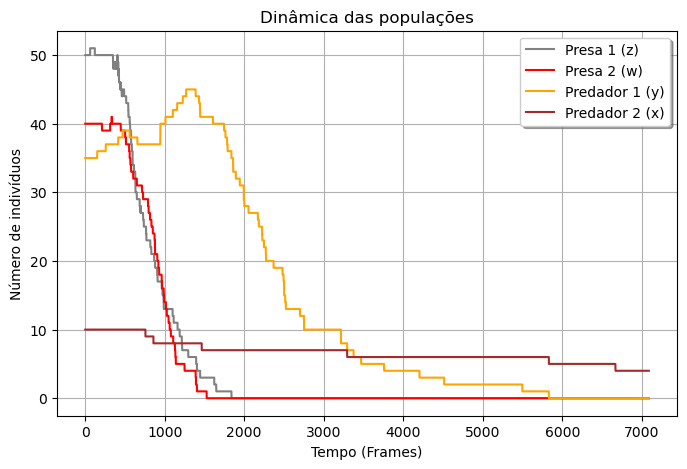

In [51]:
# ------------------------ Plota os dados da simulação ----------------------- #
plt.figure(figsize=(8,5))

plt.title('Dinâmica das populações')

plt.xlabel('Tempo (Frames)')
plt.ylabel('Número de indivíduos')

plt.plot(eixo_x, eixo_y1, label='Presa 1 (z)', color='grey')
plt.plot(eixo_x, eixo_y2, label='Presa 2 (w)', color='red')
plt.plot(eixo_x, eixo_y3, label='Predador 1 (y)', color='orange')
plt.plot(eixo_x, eixo_y4, label='Predador 2 (x)', color='brown')

plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 

### Dados do método numérico:

In [52]:
# ------------ Implementa o método de Runge-Kutta de quarta ordem ------------ #
def runge_kutta(f, u0, t, h, *args):
    u = u0
    result = [u0]
    for ti in t[1:]:
        k1 = h * f(ti, u, *args)
        k2 = h * f(ti + h / 2, u + k1 / 2, *args)
        k3 = h * f(ti + h / 2, u + k2 / 2, *args)
        k4 = h * f(ti + h, u + k3, *args)
        u = u + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        result.append(u)
    return np.array(result)

In [53]:
# --------------------- Define as equações Lotka-Volterra -------------------- #
def lotka_volterra(t, u, alpha, beta, A, phi, lambd, gamma, D, psi, E, F):
    x, y, z, w = u
    xdot = alpha * x * y - beta * x * y - A * x 
    ydot = -alpha * y * x - phi * y * z + lambd * y * z + gamma * y * w - D * y
    zdot = -lambd * z * y - psi * z + E * z
    wdot = -gamma * w * y + F * w
    return np.array([xdot, ydot, zdot, wdot])

In [54]:
# ---------------- Define parâmetros do sistema Lotka-Volterra --------------- #
alpha = 0.004
beta = 0.05
A = 0.04
phi = 0.10
lambd = 0.50
gamma = 0.60
D = 0.052
psi = 0.15
E = 0.06
F = 0.04

# Condições iniciais:
u0 = np.array([.20, .30, .50, .60])

# Intervalo de tempo:
t = np.linspace(0, 200, 1000)

# Passo de tempo:
h = t[1] - t[0]

In [55]:

# ---------------------- Executa o método de Runge-Kutta --------------------- #
solution = runge_kutta(lotka_volterra, u0, t, h, alpha, beta, A, phi, lambd, gamma, D, psi, E, F)


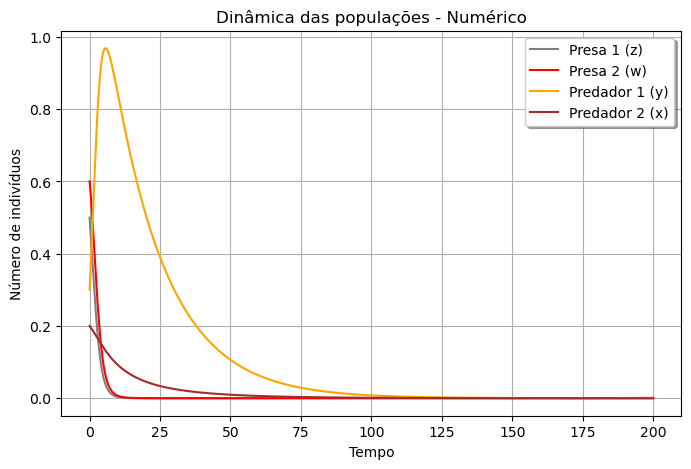

In [56]:
# ----------------------- Plota os resultados numéricos ---------------------- #
plt.figure(figsize=(8,5))

plt.title('Dinâmica das populações - Numérico')

plt.xlabel('Tempo')
plt.ylabel('Número de indivíduos')

plt.plot(t, solution[:, 2], label='Presa 1 (z)', color='grey')
plt.plot(t, solution[:, 3], label='Presa 2 (w)', color='red')
plt.plot(t, solution[:, 1], label='Predador 1 (y)', color='orange')
plt.plot(t, solution[:, 0], label='Predador 2 (x)', color='brown')

plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 